# 2. 머신러닝 프로젝트 처음부터 끝까지

__참고:__ 오렐리앙 제롱의 [<핸즈온 머신러닝(3판)>](https://github.com/ageron/handson-ml3) 
2장의 소스코드를 사용합니다.

**기본 설정**

파이썬 3.7 이상을 요구한다.

In [1]:
import sys
assert sys.version_info >= (3, 7)

사이킷런 1.0.1 이상을 요구한다.

In [2]:
import sklearn
assert sklearn.__version__ >= "1.0.1"

## 데이터 구하기

캘리포니아 주의 구역별 중간 주택 가격을 예측하는 모델을 훈련시키려 한다.
이를 위해 먼저 데이터를 다운로드하고 적재한다.

### 데이터 다운로드

* 온라인 상에 저장된 압축파일을 가져오기
* 압축파일을 풀어 csv 파일로 저장 후 적재

In [3]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

### 데이터 구조 훑어보기

**첫 5 개의 데이터 확인**

In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


**데이터셋 기본 정보 확인**

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**범주형 특성 탐색**

In [6]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

**수치형 특성 탐색**

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


이미지를 저장하는 폴더의 경로를 지정한다. 
`save_fig()` 함수는 생성된 이미지를 저장하는 함수인데 여기서는 사용하지 않는다.

In [8]:
# 이미지 저장 경로

IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

# def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
#     path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
#     if tight_layout:
#         plt.tight_layout()
#     plt.savefig(path, format=fig_extension, dpi=resolution)

다음은 이미지에 포함된 폰트 크기를 설정한다.

In [9]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

**수치형 특성별 히스토그램**

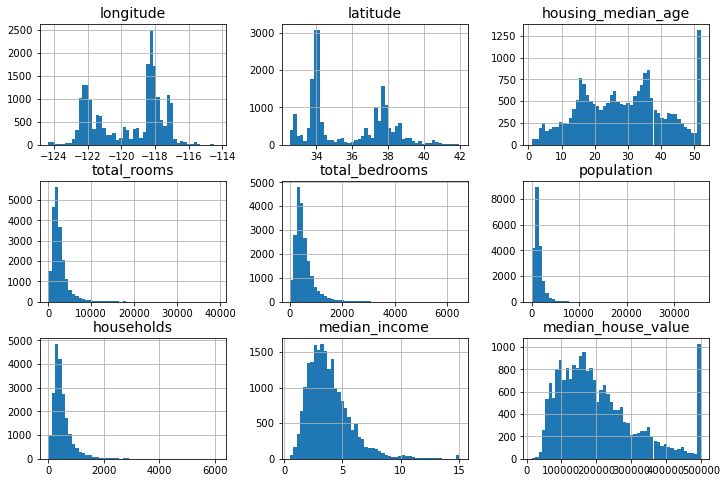

In [10]:
housing.hist(bins=50, figsize=(12, 8))
# save_fig("attribute_histogram_plots")  # 그림 저장용
plt.show()

### 테스트셋 만들기

랜덤 시드 지정은 무작위성을 이용하는 코드의 실행에서 매번 동일한 결과를 얻기 위해 사용된다.

In [11]:
import numpy as np

np.random.seed(42)

**무작위 추출**

20% 정도를 테스트셋으로 지정한다.

In [12]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

무작위로 추출된 훈련셋과 테스트셋이 정확이 8대 2로 구분된다.

In [13]:
len(train_set)

16512

In [14]:
len(test_set)

4128

**층화표집**

중간 소득을 이용하여 층화표집(stratified sampling)을 실행한다.

* 대부분 구역의 중간 소득이 1.5 ~ 6.0(15,000~60,000&#x24;) 사이임.
* 소득 구간을 5개로 구분

    ```python
    [0, 1.5, 3.0, 4.6, 6.0, np,inf]
    ```

소득 구간별 히스트로그램은 다음과 같다.

In [15]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

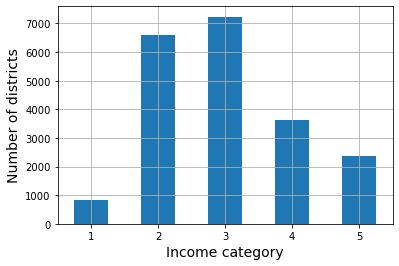

In [16]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

소득을 기준으로 층화표집을 진행한다.

- `stratify=housing["income_cat"]` 키워드 인자 활용

In [17]:
strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

층화표집은 모집단의 비율을 거의 그대로 유지하지만
무작위 추출은 비율이 좀 더 많이 달라진다.

In [18]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": income_cat_proportions(housing),
    "Stratified %": income_cat_proportions(strat_test_set),
    "Random %": income_cat_proportions(test_set),
}).sort_index()

compare_props.index.name = "Income Category"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)

(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Income Category,,,,,
1,3.98,4.00,4.24,0.36,6.45
2,31.88,31.88,30.74,-0.02,-3.59
3,35.06,35.05,34.52,-0.01,-1.53
4,17.63,17.64,18.41,0.03,4.42
5,11.44,11.43,12.09,-0.08,5.63


**데이터 되돌리기**

훈련셋과 테스트셋을 구분하기 위해 사용된 `income_cat` 특성은
모델 훈련에 필요없기에 삭제한다.

In [19]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

## 데이터 탐색과 시각화

훈련셋만을 대상으로 탐색과 시각화를 적용한다.
먼저 훈련셋 원본을 그대로 두고 복사해서 사용한다.

In [20]:
housing = strat_train_set.copy()

### 지리적 데이터 시각화

* `grid` 키워드 인자 활용

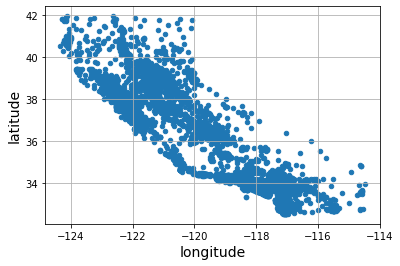

In [21]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)
plt.show()

* `alpha` 키워드 인자 활용: 구역이 밀집되어 모여있는 정도를 보다 선명하게 보여줌.

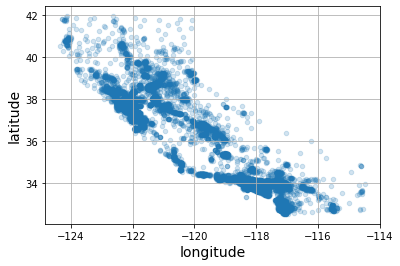

In [22]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.show()

* 중간 주택 가격을 색상으로 활용하기
    * `sharex=False` : x-축의 값과 범례를 표시하지 못하는 버그 수정 용도이며 임시 방편 해결책임
        참고: https://github.com/pandas-dev/pandas/issues/10611

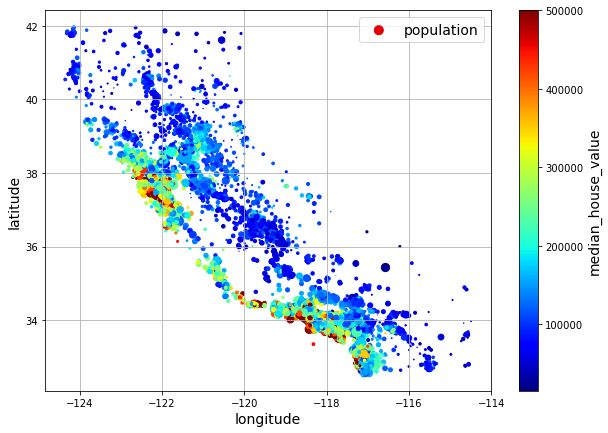

In [23]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"] / 100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
plt.show()

* 캘리포니아 지도와 합치기

In [24]:
# 캘리포니아 지도 다운로드
filename = "california.png"
if not (IMAGES_PATH / filename).is_file():
    homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
    url = homl3_root + "images/end_to_end_project/" + filename
    print("Downloading", filename)
    urllib.request.urlretrieve(url, IMAGES_PATH / filename)

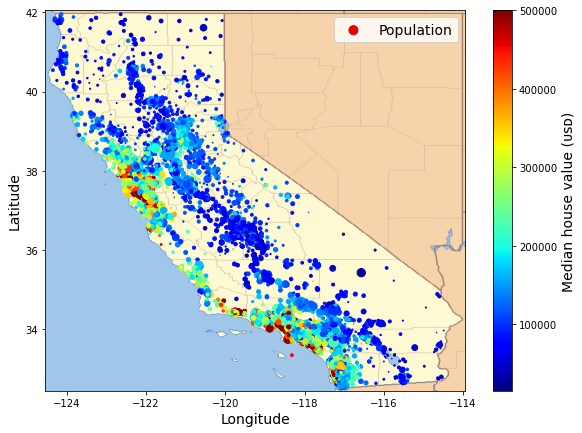

In [25]:
housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})

housing_renamed.plot(
             kind="scatter", x="Longitude", y="Latitude",
             s=housing_renamed["Population"] / 100, label="Population",
             c="Median house value (ᴜsᴅ)", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))

california_img = plt.imread(IMAGES_PATH / filename)
axis = -124.55, -113.95, 32.45, 42.05
plt.axis(axis)
plt.imshow(california_img, extent=axis)

plt.show()

### 상관관계 조사

* 모든 수치형 특성 간의 표준 상관계수 계산

In [26]:
corr_matrix = housing.corr()

* 중간 주택 가격과 다른 특성 간의 상관관계 확인

In [27]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

* 특성들 사이의 상관관계를 나타내는 산점도

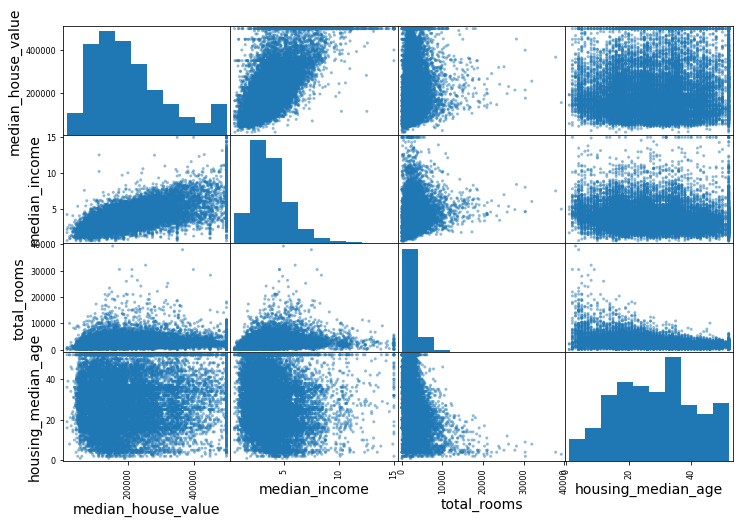

In [28]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

* 중간 소득 대 중간 주택 가격 산점도

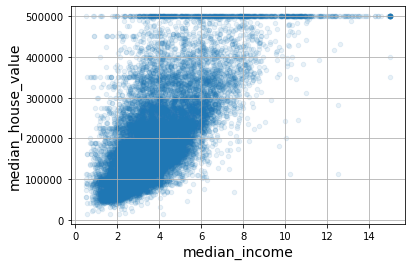

In [29]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1, grid=True)
plt.show()

## 데이터 준비

중간 주택 가격을 타깃값(레이블)으로 지정한다.

- `housing`: 훈련에 사용되는 특성 9개 (중간 주택 가격 제외)
- `housing_labels`: 중간 주택 가격

In [30]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

### 데이터 정제

**`total_bedrooms` 특성에 존재하는 누락치 처리법 결정**

- 누락치가 있는 샘플 데이터 확인하기

In [31]:
null_rows_idx = housing.isnull().any(axis=1)
housing.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14452,-120.67,40.50,15.0,5343.0,NaN,2503.0,902.0,3.5962,INLAND
18217,-117.96,34.03,35.0,2093.0,NaN,1755.0,403.0,3.4115,<1H OCEAN
11889,-118.05,34.04,33.0,1348.0,NaN,1098.0,257.0,4.2917,<1H OCEAN
20325,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,<1H OCEAN
14360,-117.87,33.62,8.0,1266.0,NaN,375.0,183.0,9.8020,<1H OCEAN


- 누락치 처리 방법 세 가지
    - 옵션 1: 누락치가 있는 샘플 삭제
    - 옵션 2: 누락치가 있는 특성 삭제
    - 옵션 3: 누락치를 특성 중앙값 등으로 채우기

* 옵션 1

In [32]:
housing_option1 = housing.copy()

housing_option1.dropna(subset=["total_bedrooms"], inplace=True)  # 옵션 1

housing_option1.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


* 옵션 2

In [33]:
housing_option2 = housing.copy()

housing_option2.drop("total_bedrooms", axis=1, inplace=True)  # 옵션 2

housing_option2.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
14452,-120.67,40.50,15.0,5343.0,2503.0,902.0,3.5962,INLAND
18217,-117.96,34.03,35.0,2093.0,1755.0,403.0,3.4115,<1H OCEAN
11889,-118.05,34.04,33.0,1348.0,1098.0,257.0,4.2917,<1H OCEAN
20325,-118.88,34.17,15.0,4260.0,1701.0,669.0,5.1033,<1H OCEAN
14360,-117.87,33.62,8.0,1266.0,375.0,183.0,9.8020,<1H OCEAN


* 옵션 3

In [34]:
housing_option3 = housing.copy()

median = housing["total_bedrooms"].median()
housing_option3["total_bedrooms"].fillna(median, inplace=True)  # 옵션 3

housing_option3.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14452,-120.67,40.50,15.0,5343.0,434.0,2503.0,902.0,3.5962,INLAND
18217,-117.96,34.03,35.0,2093.0,434.0,1755.0,403.0,3.4115,<1H OCEAN
11889,-118.05,34.04,33.0,1348.0,434.0,1098.0,257.0,4.2917,<1H OCEAN
20325,-118.88,34.17,15.0,4260.0,434.0,1701.0,669.0,5.1033,<1H OCEAN
14360,-117.87,33.62,8.0,1266.0,434.0,375.0,183.0,9.8020,<1H OCEAN


**`SimpleImputer` 변환기**

`SimpleImputer` 변환기를 활용하면 옵션 3을 쉽게 처리할 수 있다.

In [35]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

중앙값이 수치형 특성에서만 계산될 수 있기 때문에 범주형 특성을 제거한 후에 `SimpleImputer` 변환기를 적용해야 한다.

In [36]:
housing_num = housing.select_dtypes(include=[np.number])

`SimpleImputer` 변환기의 `fit()` 메서드는 지정된 통계 특성값을 계산하여 저장해 둔다.

* `statistics_` 속성에 저장됨.

In [37]:
imputer.fit(housing_num)

imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

각 특성의 중앙값이 수동으로 계산한 것과 동일하다.

In [38]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

`transform()` 메서드를 실행하여 수치형 특성을 변환한다.
반환값은 넘파이 어레이 자료형이다.

In [39]:
X = imputer.transform(housing_num)
X

array([[-1.2242e+02,  3.7800e+01,  5.2000e+01, ...,  1.5760e+03,
         1.0340e+03,  2.0987e+00],
       [-1.1838e+02,  3.4140e+01,  4.0000e+01, ...,  6.6600e+02,
         3.5700e+02,  6.0876e+00],
       [-1.2198e+02,  3.8360e+01,  3.3000e+01, ...,  5.6200e+02,
         2.0300e+02,  2.4330e+00],
       ...,
       [-1.1706e+02,  3.2590e+01,  1.3000e+01, ...,  2.8140e+03,
         7.6000e+02,  4.0616e+00],
       [-1.1840e+02,  3.4060e+01,  3.7000e+01, ...,  1.7250e+03,
         8.3800e+02,  4.1455e+00],
       [-1.2241e+02,  3.7660e+01,  4.4000e+01, ...,  6.8200e+02,
         2.1200e+02,  3.2833e+00]])

결측치가 중앙값으로 채워진 것을 확인할 수 있다.

**참고:** 모델 훈련에 필수사항은 아니지만 편의상 팬다스의 데이터프레임을 이용하면 보다 보기가 좋다. 
데이터프레임으로 형변환시키기 위해 특성 이름을 활용한다. 

In [40]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

housing_tr.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14452,-120.67,40.50,15.0,5343.0,434.0,2503.0,902.0,3.5962
18217,-117.96,34.03,35.0,2093.0,434.0,1755.0,403.0,3.4115
11889,-118.05,34.04,33.0,1348.0,434.0,1098.0,257.0,4.2917
20325,-118.88,34.17,15.0,4260.0,434.0,1701.0,669.0,5.1033
14360,-117.87,33.62,8.0,1266.0,434.0,375.0,183.0,9.8020


### 텍스트와 범주형 특성 다루기

해안 근접도(`ocean_proximity`)는 문자열을 사용한다.

In [41]:
pd.unique(housing["ocean_proximity"])

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

**`OrdinalEncoder` 클래스**

범주형 특성값을 `OrdinalEncoder` 클래스를 이용하여 단순하게 0, 1, 2, 3, 4 등으로 
수치화할 수 있다.

In [42]:
housing_cat = housing[["ocean_proximity"]]

In [43]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [44]:
housing_cat_encoded[:5]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.]])

**`OneHotEncoder` 클래스**

수치화된 번호는 범주들의 인덱스에 해당한다.
하지만 숫자의 크기가 모델 훈련 과정에 잘못된 영향을 줄 수 있음에 주의해야 한다.
따라서 여기서는 대신에 원-핫-인코딩을 활용한다.

- 범주 수 만큼의 새로운 특성 추가
- 해당되는 범주와 관련된 특성값은 1, 나머지 특성값은 0.

In [45]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

원-핫-인코딩 변환기의 `transform()` 메서드는 기본적으로 
**희소 행렬**<font size="2">sparse matrix</font>을 반환한다.

In [46]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

`toarray()` 메서드가 희소 행렬을 밀집 배열<font size="2">dene matrix</font>로 변환한다.

In [47]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

처음부터 `OneHotEncoder` 변환기의 `sparse=False` 하이퍼파라미터를 사용하면 밀집 행렬이 생성된다.

In [48]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

변환에 사용된 범주들은 `categories_` 속성에 저장된다.

In [49]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

변환된 특성 이름은 `feature_names_in_` 속성에 저징된다.

In [50]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

새로 생성된 특성 이름은 `get_feature_names_out()` 함수를 통해 확인한다.

In [51]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

새로 생성된 특성 이름과 기존 인덱스를 사용하여 넘파이 어레이에서
데이터프레임을 생성하면 다음과 같다.

In [52]:
df_output = pd.DataFrame(housing_cat_1hot,
                         columns=cat_encoder.get_feature_names_out(),
                         index=housing_cat.index)

df_output.head()

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
13096,0.0,0.0,0.0,1.0,0.0
14973,1.0,0.0,0.0,0.0,0.0
3785,0.0,1.0,0.0,0.0,0.0
14689,0.0,1.0,0.0,0.0,0.0
20507,0.0,0.0,0.0,0.0,1.0


### 특성 스케일링

* min-max 스케일링

In [53]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

* 표준화

In [54]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

### 사용자 정의 변환 클래스

* 로그 함수 변환기 활용: 구역별 인구 특성 등에 적용
    - `FunctionTransformer` 클래스 활용

In [55]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(housing[["population"]])

* 비율 계산 변환기 활용법: 가구당 인원, 가구당 방수, 방당 침실 수 등 새로운 특성 생성
    - `FunctionTransformer` 클래스 활용

In [56]:
ratio_transformer = FunctionTransformer(lambda X: X[:, [0]] / X[:, [1]])

* 군집 유사도 적용 변환기 직접 구현
    * `BaseEstimator` 클래스와 `TransformerMixin` 클래스를 기본으로 상속

In [57]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    # 군집화
    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # fit() 함수의 반환값은 언제나 self!

    # fit() 이 찾아낸 군집별 유사도를 새로운 특성으로 추가
    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    # 새롭게 생성된 특성 이름
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

군집 유사도 변환기를 구역별 경도와 위도 특성에 대해 적용하면
모든 구역을 지정된 개수(여기서는 10개)의 군집으로 분류한다.
그런 다음 구역별로 각 군집에 대한 유사도를 측정하여
새로운 (10개의) 특성을 생성한다.

In [58]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
similarities = cluster_simil.fit_transform(housing[["latitude", "longitude"]],
                                           sample_weight=housing_labels)

In [59]:
similarities[:3].round(2)

array([[0.  , 0.14, 0.  , 0.  , 0.  , 0.08, 0.  , 0.99, 0.  , 0.6 ],
       [0.63, 0.  , 0.99, 0.  , 0.  , 0.  , 0.04, 0.  , 0.11, 0.  ],
       [0.  , 0.29, 0.  , 0.  , 0.01, 0.44, 0.  , 0.7 , 0.  , 0.3 ]])

### 변환 파이프라인

**수치형 특성 변환 파이프라인**

In [60]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

`make_pipeline()` 함수를 이용할 수도 있다. 
단, 각 변환기의 이름은 자동으로 생성된다.

In [61]:
from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), 
                             StandardScaler())

**인터액티브 파이프라인 다이어그램**

`set_config(display='diagram')`을 실행하면 주피터 노트북에서 파이프라인을 
대화식 다이어그램으로 활용할 수 있다.

In [62]:
from sklearn import set_config

set_config(display='diagram')

파이프라인의 구성 요소를 다양한 방식으로 확인하고 지정할 수 있다.

In [63]:
num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

- `steps` 속성: 파이프라인 구성 요소

In [64]:
num_pipeline.steps

[('simpleimputer', SimpleImputer(strategy='median')),
 ('standardscaler', StandardScaler())]

- 인덱싱 활용 가능

In [65]:
num_pipeline[1]

StandardScaler()

- 슬라이싱 활용 가능

In [66]:
num_pipeline[:-1]

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median'))])

- 변환기 이름을 인덱스로 사용 가능

In [67]:
num_pipeline.named_steps["simpleimputer"]

SimpleImputer(strategy='median')

* 변환기의 하이퍼파라미터 지정 가능

In [68]:
num_pipeline.set_params(simpleimputer__strategy="mean")  # 평균값으로 결측치 채우기

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [69]:
num_pipeline.set_params(simpleimputer__strategy="median")  # 중앙값으로 결측치 채우기

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

**파이프라인 활용법 예제**

파이프라인 활용법은 변환기/예측기 활용법과 동일하다.

In [70]:
housing_num_prepared = num_pipeline.fit_transform(housing_num)

아래 코드는 사이킷런 1.0.0 버전에 포함된
일부 변환기의 `get_feature_names_out()` 메서드가 작동하지 않는 문제를 해결한다.

In [71]:
# 사이킷런의 이후 버전에서는 필요하지 않을 수 있다.

def monkey_patch_get_signature_names_out():
    """Monkey patch some classes which did not handle get_feature_names_out()
       correctly in 1.0.0."""
    from inspect import Signature, signature, Parameter
    import pandas as pd
    from sklearn.impute import SimpleImputer
    from sklearn.pipeline import make_pipeline, Pipeline
    from sklearn.preprocessing import FunctionTransformer, StandardScaler

    default_get_feature_names_out = StandardScaler.get_feature_names_out

    if not hasattr(SimpleImputer, "get_feature_names_out"):
      print("Monkey-patching SimpleImputer.get_feature_names_out()")
      SimpleImputer.get_feature_names_out = default_get_feature_names_out

    if not hasattr(FunctionTransformer, "get_feature_names_out"):
        print("Monkey-patching FunctionTransformer.get_feature_names_out()")
        orig_init = FunctionTransformer.__init__
        orig_sig = signature(orig_init)

        def __init__(*args, feature_names_out=None, **kwargs):
            orig_sig.bind(*args, **kwargs)
            orig_init(*args, **kwargs)
            args[0].feature_names_out = feature_names_out

        __init__.__signature__ = Signature(
            list(signature(orig_init).parameters.values()) + [
                Parameter("feature_names_out", Parameter.KEYWORD_ONLY)])

        def get_feature_names_out(self, names=None):
            if self.feature_names_out is None:
                return default_get_feature_names_out(self, names)
            elif callable(self.feature_names_out):
                return self.feature_names_out(names)
            else:
                return self.feature_names_out

        FunctionTransformer.__init__ = __init__
        FunctionTransformer.get_feature_names_out = get_feature_names_out

monkey_patch_get_signature_names_out()

Monkey-patching SimpleImputer.get_feature_names_out()
Monkey-patching FunctionTransformer.get_feature_names_out()


변환된 넘파이 어레이를 데이터프레임으로 변환하기 위해서는
행과 칸의 이름을 지정하면 된다.

In [72]:
df_housing_num_prepared = pd.DataFrame(housing_num_prepared, 
                                       columns=num_pipeline.get_feature_names_out(),
                                       index=housing_num.index)

df_housing_num_prepared.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942
3785,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789
14689,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281
20507,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365


**`ColumnTransformer` 클래스 활용**

특성별로 파이프라인을 지정할 수 있다.

In [73]:
from sklearn.compose import ColumnTransformer

num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

# 범주형 특성 파이프라인
cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

# 수치형과 범주형을 구별하여 파이프라인 구성
preprocessing = ColumnTransformer([("num", num_pipeline, num_attribs),
                                   ("cat", cat_pipeline, cat_attribs),
                                  ])

`make_column_selector()` 함수는 파이프라인을 적용할 특성을 선택하는 데 사용한다.
`make_column_transformer()` 함수는 `make_pipeline()` 함수와 유사한 방식으로 작동하며
`ColumnTransformer` 객체를 생성한다.

In [74]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),     # np.object 대신 object 사용
)

사용법은 동일하다.

In [75]:
housing_prepared = preprocessing.fit_transform(housing)

### 캘리포니아 데이터셋 변환 파이프라인

지금까지 소개한 변환기와 파이프라인을 정리하면 다음과 같다. 

In [76]:
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_pipeline(name=None):
    return make_pipeline(SimpleImputer(strategy="median"),
                         FunctionTransformer(column_ratio, 
                                             feature_names_out=[name]),  # sklearn 1.1 버전부터 지원부터.
                         StandardScaler())

log_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                             FunctionTransformer(np.log),
                             StandardScaler())

cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)

default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())

# 정제와 전처리 과정 전체를 아우루는 변환 파이프라인
preprocessing = ColumnTransformer([
        ("bedrooms_ratio", ratio_pipeline("bedrooms_ratio"), 
                           ["total_bedrooms", "total_rooms"]),                 # 방당 침실 수
        ("rooms_per_house", ratio_pipeline("rooms_per_house"), 
                            ["total_rooms", "households"]),                    # 가구당 방 수
        ("people_per_house", ratio_pipeline("people_per_house"), 
                            ["population", "households"]),                     # 가구당 인원
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", 
                               "population", "households", "median_income"]),  # 로그 변환
        ("geo", cluster_simil, ["latitude", "longitude"]),                     # 구역별 군집 정보
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),     # 범주형 특성 전처리
    ],
    remainder=default_num_pipeline)                        # 중간 주택 년수(housing_median_age) 대상

정제와 전처리를 동시해 진행한 결과는 다음과 같다.

In [77]:
housing_prepared = preprocessing.fit_transform(housing)

변환된 입력 데이터셋은 총 24개의 특성을 갖는다.

In [78]:
housing_prepared.shape

(16512, 24)

특성 이름은 다음과 같다.

In [79]:
preprocessing.get_feature_names_out()

array(['bedrooms_ratio__bedrooms_ratio',
       'rooms_per_house__rooms_per_house',
       'people_per_house__people_per_house', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age'], dtype=object)

## 모델 선택과 훈련

### 훈련셋 대상 훈련 및 평가

이어서 소개되는 모든 모델은 앞서 설명한 전처리 과정과 함께 하나의 파이프라인으로 묶여서 정의된다. 이는 테스트셋과 미래의 모든 입력 데이터셋에 대해서도 전처리를 별도로 신경쓸 필요가 없게 해준다.

**선형 회귀 모델**

* 훈련

In [80]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms_ratio',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=['bedrooms_ratio'],
                                                                                       f...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9b14415ca0>)])),
                ('linearregression', LinearRegression())])

* 예측

In [81]:
housing_predictions = lin_reg.predict(housing)
housing_predictions[:5].round(-2)  # -2 = rounded to the nearest hundred

array([243700., 372400., 128800.,  94400., 328300.])

실제 중간 주택 가격은 다음과 같으며, 예측값과 오차가 꽤 난다.

In [82]:
housing_labels.iloc[:5].values

array([458300., 483800., 101700.,  96100., 361800.])

오차를 계산해보자.

In [83]:
# extra code – computes the error ratios discussed in the book
error_ratios = housing_predictions[:5].round(-2) / housing_labels.iloc[:5].values - 1
print(", ".join([f"{100 * ratio:.1f}%" for ratio in error_ratios]))

-46.8%, -23.0%, 26.6%, -1.8%, -9.3%


예측값의 RMSE가 68687 정도로 많이 높다.
과소 적합이 발행하였으며 이는 선형회귀 모델이 적절하지 않음을 의미한다.

In [84]:
from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(housing_labels, housing_predictions,
                              squared=False)
lin_rmse

68687.89176590084

**결정트리 회귀 모델**

* 훈련

In [85]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms_ratio',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=['bedrooms_ratio'],
                                                                                       f...
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9b14415ca0>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

**예측**

RMSE가 0으로 나온다.
이는 결정트리 모델이 심하게 과대 적합되었음을 의미한다.
이런 모델은 전혀 의미가 없다.

In [86]:
housing_predictions = tree_reg.predict(housing)
tree_rmse = mean_squared_error(housing_labels, housing_predictions,
                              squared=False)
tree_rmse

0.0

### 교차 검증

**`cross_val_score()` 함수**

교차 검증을 이용하여 훈련 과정 중의 모델 성능 평가를 진행한다.
교차 검증은 경우에 따라 많은 시간을 요한다.

* 결정트리 모델에 대한 교차 검증

In [87]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, housing, housing_labels,
                              scoring="neg_root_mean_squared_error", 
                              cv=10)

`cv=10` 설정에 의해 10 개의 폴드를 사용하며 매번 RMSE를 측정한다.

In [88]:
tree_rmses

array([66506.70121103, 67097.20497743, 66144.65155743, 65069.22056897,
       64727.51994473, 70094.77824639, 67685.73110573, 68411.33556978,
       69293.5932016 , 63649.53649274])

`pandas.Series` 로 변환하면 통계 정보를 쉽게 구할 수 있다.
결과가 이전에 하나의 결정트리 모델만 사용했을 때 보다 훨씬 나쁘다.

In [89]:
pd.Series(tree_rmses).describe()

count       10.000000
mean     66868.027288
std       2060.966425
min      63649.536493
25%      65338.078316
50%      66801.953094
75%      68229.934454
max      70094.778246
dtype: float64

* 선형회귀 모델에 대한 교차 검증: 결정트리 모델의 교차검증 보다 약간 나쁨.

In [90]:
lin_rmses = -cross_val_score(lin_reg, housing, housing_labels,
                              scoring="neg_root_mean_squared_error", cv=10)
pd.Series(lin_rmses).describe()

count       10.000000
mean     69858.018195
std       4182.205077
min      65397.780144
25%      68070.536263
50%      68619.737842
75%      69810.076342
max      80959.348171
dtype: float64

**램덤 포레스트 회귀 모델**

램덤 포레스트 모델에 교차 검증을 적용하면 보다 많은 시간이 걸린다.
아래 코드는 컴퓨터 사양에 따라 몇 분 이상 걸릴 수 있다.

In [91]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing,
                           RandomForestRegressor(n_estimators=100, random_state=42))

In [92]:
forest_rmses = -cross_val_score(forest_reg, housing, housing_labels,
                                scoring="neg_root_mean_squared_error", cv=10)

선형 회귀 모델과 결정트리 회귀 모델보다 성능이 좋다.

In [93]:
pd.Series(forest_rmses).describe()

count       10.000000
mean     47019.561281
std       1033.957120
min      45458.112527
25%      46464.031184
50%      46967.596354
75%      47325.694987
max      49243.765795
dtype: float64

그런데 훈련셋에 대한 RMSE는 훨씬 낮다. 
이는 훈련된 랜덤 포레스트 모델이 훈련셋에 과대적합되었음을 의미한다. 
즉, 훈련에 사용된 데이터에 너무 많이 적응되었다. 

In [94]:
forest_reg.fit(housing, housing_labels)
housing_predictions = forest_reg.predict(housing)

forest_rmse = mean_squared_error(housing_labels, housing_predictions,
                                 squared=False)
forest_rmse

17474.619286483998

## 모델 튜닝

### 그리드 탐색

아래 코드는 컴퓨터 사양에 따라 몇 분 이상 걸릴 수 있다.

In [95]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])

# 하아퍼파라미터 조합 후보
param_grid = [
    {'preprocessing__geo__n_clusters': [5, 8, 10],  # ClusterSimilarity 클래스 하이퍼파라미터: 군집 수
     'random_forest__max_features': [4, 6, 8]},     # 랜덤 포레스트 하이퍼파라미터
    {'preprocessing__geo__n_clusters': [10, 15],
     'random_forest__max_features': [6, 8, 10]},
]

grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')

grid_search.fit(housing, housing_labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms_ratio',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f9b14415ca0>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

**`full_pipeline.get_params().keys()`**

파이프라인에 포함된 변환기와 예측기의 하이퍼파라미터 전체를 확인할 수 있다.
예를 들어, 사용가능한 10개의 하이퍼파라미터는 다음과 같다.

In [96]:
list(full_pipeline.get_params().keys())[:10]

['memory',
 'steps',
 'verbose',
 'preprocessing',
 'random_forest',
 'preprocessing__n_jobs',
 'preprocessing__remainder__memory',
 'preprocessing__remainder__steps',
 'preprocessing__remainder__verbose',
 'preprocessing__remainder__simpleimputer']

예를 들어, 'preprocessing__geo__n_clusters' 가 포함되어 있음을 확인할 수 있다.

In [97]:
'preprocessing__geo__n_clusters' in full_pipeline.get_params().keys()

True

**best_params_ 속성**

그리드 탐색을 통해 찾아낸 최선의 하이퍼파라미터 조합은 다음과 같다.

In [98]:
grid_search.best_params_

{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}

**best_estimator_ 속성**

그리드 탐색을 통해 찾아낸 최선의 모델은 다음과 같다.

In [99]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms_ratio',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=['bedrooms_ratio'],
                                                                                       func=...
                                                  ClusterSimilarity(n_clusters=15,
                                                                    random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9b17f33130>)])),
                ('random_forest',
                 RandomForestRegressor(max_features=6, random_state=42))])

**cv_results_ 속성 활용**

그리드 탐색 과정에서 훈련된 각 모델의 평가지표를 확인할 수 있다.
원래 사전 자료형으로 지정되며, 
키(key)는 랜덤 포레스트 모델의 하이퍼파라미터와 각 모델의 훈련 성능과 관련된다.

사전을 데이터프레임으로 변환하면 보다 보기가 편하다.
데이터프레임의 칸은 사전 자료형의 키를 사용한다.

In [100]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing__geo__n_clusters,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1.955746,0.006639,0.090574,0.000399,5,4,"{'preprocessing__geo__n_clusters': 5, 'random_...",-47412.016772,-47261.396526,-48852.730810,-47842.048036,717.301130,14
1,2.583663,0.017385,0.090162,0.000765,5,6,"{'preprocessing__geo__n_clusters': 5, 'random_...",-47354.177804,-47219.625145,-48499.483295,-47691.095415,574.249846,13
2,3.363789,0.132400,0.089951,0.000128,5,8,"{'preprocessing__geo__n_clusters': 5, 'random_...",-47484.861669,-47569.282286,-48581.150615,-47878.431523,498.091224,15
3,2.015997,0.024817,0.096268,0.001557,8,4,"{'preprocessing__geo__n_clusters': 8, 'random_...",-45280.997538,-45013.207628,-46318.769003,-45537.658056,563.044458,10
4,2.702336,0.012244,0.094175,0.002876,8,6,"{'preprocessing__geo__n_clusters': 8, 'random_...",-45200.755429,-44969.179679,-46101.731945,-45423.889017,488.542122,7


RMSE(`"mean_test_score"`)를 기준으로 내림차순으로 정렬한다.

In [101]:
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing__geo__n_clusters,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
12,2.931345,0.062311,0.093236,0.002087,15,6,"{'preprocessing__geo__n_clusters': 15, 'random...",-43459.598047,-43918.632694,-44747.781772,-44042.004171,533.085183,1
13,3.489984,0.011641,0.093969,0.001299,15,8,"{'preprocessing__geo__n_clusters': 15, 'random...",-44132.027207,-44075.251239,-45009.672809,-44405.650418,427.736807,2
14,4.234770,0.028556,0.095153,0.002513,15,10,"{'preprocessing__geo__n_clusters': 15, 'random...",-44374.325167,-44285.549219,-45316.375999,-44658.750128,466.421934,3
7,2.874441,0.012575,0.097688,0.002459,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",-44683.355320,-44654.825561,-45657.384730,-44998.521871,466.031964,4
9,2.711309,0.019907,0.096620,0.003775,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",-44683.355320,-44654.825561,-45657.384730,-44998.521871,466.031964,4


그리드 탐색에 사용된 하이퍼파라미터와 몇 개의 성능 측정값만 사용해보자.

In [102]:
cv_res = cv_res[["param_preprocessing__geo__n_clusters",
                 "param_random_forest__max_features", 
                 "split0_test_score",
                 "split1_test_score", 
                 "split2_test_score", 
                 "mean_test_score"]]
cv_res.head()

,param_preprocessing__geo__n_clusters,param_random_forest__max_features,split0_test_score,split1_test_score,split2_test_score,mean_test_score
12,15,6,-43459.598047,-43918.632694,-44747.781772,-44042.004171
13,15,8,-44132.027207,-44075.251239,-45009.672809,-44405.650418
14,15,10,-44374.325167,-44285.549219,-45316.375999,-44658.750128
7,10,6,-44683.355320,-44654.825561,-45657.384730,-44998.521871
9,10,6,-44683.355320,-44654.825561,-45657.384730,-44998.521871


하이퍼파라미터 및 성능 측정값의 이름을 보다 간단한 이름으로 변경해보자.

In [103]:
score_cols = ["split0", "split1", "split2", "mean_test_rmse"]
cv_res.columns = ["n_clusters", "max_features"] + score_cols
cv_res.head()

,n_clusters,max_features,split0,split1,split2,mean_test_rmse
12,15,6,-43459.598047,-43918.632694,-44747.781772,-44042.004171
13,15,8,-44132.027207,-44075.251239,-45009.672809,-44405.650418
14,15,10,-44374.325167,-44285.549219,-45316.375999,-44658.750128
7,10,6,-44683.355320,-44654.825561,-45657.384730,-44998.521871
9,10,6,-44683.355320,-44654.825561,-45657.384730,-44998.521871


RMSE 등 음의 값을 양의 값으로 변환한다.

**참고:** 성능은 RMSE를 이용하고 큰 값이 좋은 성능을 의미하도록 음수로 측정된다.
이를 되돌리는 것 뿐이다.

In [104]:
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)

cv_res.head()

,n_clusters,max_features,split0,split1,split2,mean_test_rmse
12,15,6,43460,43919,44748,44042
13,15,8,44132,44075,45010,44406
14,15,10,44374,44286,45316,44659
7,10,6,44683,44655,45657,44999
9,10,6,44683,44655,45657,44999


### 랜덤 탐색

아래 코드는 총 30(=10x3) 개의 하이퍼파라미터 조합을 훈련시킨다.
컴퓨터 사양에 따라 몇 분 이상 걸릴 수 있다.

In [105]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {'preprocessing__geo__n_clusters': randint(low=3, high=50), # ClusterSimilarity 클래스 하이퍼파라미터: 군집 수
                  'random_forest__max_features': randint(low=2, high=20)}

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42)

rnd_search.fit(housing, housing_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms_ratio',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_...
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x7f9b14415ca0>)])),
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f9b18236f10>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f9b182a24c0>},
                   random_state=42, scoring='neg_root_mean_squared_error')

그리드 탐색과는 다른 최선의 조합을 찾아낸다.

* 최선의 군집 수: 45개

In [106]:
cv_res = pd.DataFrame(rnd_search.cv_results_)

# RMSE 기준 내림차순 정렬
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

# 일부 특성만 대상으로 삼기
cv_res = cv_res[["param_preprocessing__geo__n_clusters",
                 "param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
cv_res.columns = ["n_clusters", "max_features"] + score_cols

# 점수를 양수로 변환
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)
cv_res.head()

,n_clusters,max_features,split0,split1,split2,mean_test_rmse
1,45,9,41287,42150,42627,42021
8,32,7,41690,42542,43224,42485
0,41,16,42223,42959,43321,42834
5,42,4,41818,43094,43817,42910
2,23,8,42264,42996,43830,43030


**(추가 설명) 하이퍼파라미터 무작위 선택 방법**

랜덤 탐색을 하려면 특정 옵션 변수갈들을 무작위로 선택해주는 확률분포함수를 지정해야 한다. 
앞서 랜덤 탐색에서 사용한 옵션 변수와 확률분포는 다음과 같이 
이산 균등 분포를 사용하는 `randint()` 함수를 이용하였다.

```python
'preprocessing__geo__n_clusters': randint(low=3, high=50)
'random_forest__max_features': randint(low=2, high=20)
```

scipy는 이외에 다른 종류의 분포 함수를 지원한다.
많이 사용되는 분포는 다음과 같다.

* `scipy.stats.randint(a, b+1)`: 이산 균등 분포.
* `scipy.stats.uniform(a, b)`: 연속 균등 분포
* `scipy.stats.geom(1 / scale)`: 기하 분포 (이산)
* `scipy.stats.expon(scale)`: 지수 분포 (연속)

언급된 네 개의 분포 함수를 그래프로 그리면 다음과 같다.

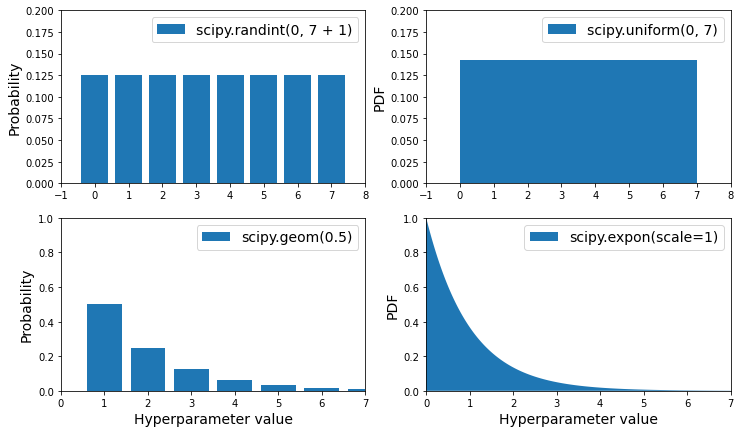

In [107]:
from scipy.stats import randint, uniform, geom, expon

xs1 = np.arange(0, 7 + 1)
randint_distrib = randint(0, 7 + 1).pmf(xs1)

xs2 = np.linspace(0, 7, 500)
uniform_distrib = uniform(0, 7).pdf(xs2)

xs3 = np.arange(0, 7 + 1)
geom_distrib = geom(0.5).pmf(xs3)

xs4 = np.linspace(0, 7, 500)
expon_distrib = expon(scale=1).pdf(xs4)

plt.figure(figsize=(12, 7))

plt.subplot(2, 2, 1)
plt.bar(xs1, randint_distrib, label="scipy.randint(0, 7 + 1)")
plt.ylabel("Probability")
plt.legend()
plt.axis([-1, 8, 0, 0.2])

plt.subplot(2, 2, 2)
plt.fill_between(xs2, uniform_distrib, label="scipy.uniform(0, 7)")
plt.ylabel("PDF")
plt.legend()
plt.axis([-1, 8, 0, 0.2])

plt.subplot(2, 2, 3)
plt.bar(xs3, geom_distrib, label="scipy.geom(0.5)")
plt.xlabel("Hyperparameter value")
plt.ylabel("Probability")
plt.legend()
plt.axis([0, 7, 0, 1])

plt.subplot(2, 2, 4)
plt.fill_between(xs4, expon_distrib, label="scipy.expon(scale=1)")
plt.xlabel("Hyperparameter value")
plt.ylabel("PDF")
plt.legend()
plt.axis([0, 7, 0, 1])

plt.show()

### 최선 모델 활용

In [108]:
final_model = rnd_search.best_estimator_                                 # 최선의 모델
feature_importances = final_model["random_forest"].feature_importances_  # 특성별 상대적 중요도

특성 이름을 추가한 후 특성별 상대적 중요도를 기준으로 내림차순으로 정렬한다.

In [109]:
sorted(zip(feature_importances,
           final_model["preprocessing"].get_feature_names_out()),
           reverse=True)

[(0.18694559869103852, 'log__median_income'),
 (0.0748194905715524, 'cat__ocean_proximity_INLAND'),
 (0.06926417748515576, 'bedrooms_ratio__bedrooms_ratio'),
 (0.05446998753775219, 'rooms_per_house__rooms_per_house'),
 (0.05262301809680712, 'people_per_house__people_per_house'),
 (0.03819415873915732, 'geo__Cluster 0 similarity'),
 (0.02879263999929514, 'geo__Cluster 28 similarity'),
 (0.023530192521380392, 'geo__Cluster 24 similarity'),
 (0.020544786346378206, 'geo__Cluster 27 similarity'),
 (0.019873052631077512, 'geo__Cluster 43 similarity'),
 (0.018597511022930273, 'geo__Cluster 34 similarity'),
 (0.017409085415656868, 'geo__Cluster 37 similarity'),
 (0.015546519677632162, 'geo__Cluster 20 similarity'),
 (0.014230331127504292, 'geo__Cluster 17 similarity'),
 (0.0141032216204026, 'geo__Cluster 39 similarity'),
 (0.014065768027447325, 'geo__Cluster 9 similarity'),
 (0.01354220782825315, 'geo__Cluster 4 similarity'),
 (0.01348963625822907, 'geo__Cluster 3 similarity'),
 (0.01338319626

### 테스트 셋으로 시스템 평가하기

In [110]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

final_predictions = final_model.predict(X_test)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(final_rmse)

41424.40026462184


**RMSE의 95% 신뢰구간**

t-분포를 이용하여 RMSE의 신뢰구간을 계산할 수 있다.

In [111]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([39275.40861216, 43467.27680583])

z-분포를 대신 이용할 수 있지만 결과는 비슷하다.

In [112]:
m = len(squared_errors)
mean = squared_errors.mean()

zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(39276.05610140007, 43466.69174996963)

## 최선 모델 저장 및 활용

**joblib 모듈**

최선의 모델을 이름을 지정하여 저장한다.

In [113]:
import joblib

joblib.dump(final_model, "my_california_housing_model.pkl")

['my_california_housing_model.pkl']

`joblib.load()` 함수를 이용하여 저장된 모델을 불러올 수 있다.
다만, 모델 정의에 필요해서 사용자가 직접 정의한 함수, 클래스 등을 모두 함께 불러와야 한다.

**참고:** 아래 코드에서는 모델 정의에 필요한 함수와 클래스가 모두 위에 있기에 오류가 발생하지 않는다.

In [114]:
import joblib

# extra code – excluded for conciseness
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics.pairwise import rbf_kernel

# def column_ratio(X):
#     return X[:, [0]] / X[:, [1]]

#class ClusterSimilarity(BaseEstimator, TransformerMixin):
#    [...]

final_model_reloaded = joblib.load("my_california_housing_model.pkl")

불어온 모델을 이용하여 예측하려면 `predict()` 메서드를 이용한다.

In [115]:
new_data = housing.iloc[:5]  # 새로운 데이터라고 가정함

predictions = final_model_reloaded.predict(new_data)
predictions

array([442737.15, 457566.06, 105965.  ,  98462.  , 332992.01])

## 연습문제

**문제 1**

Exercise: _Try a Support Vector Machine regressor (`sklearn.svm.SVR`) with various hyperparameters, such as `kernel="linear"` (with various values for the `C` hyperparameter) or `kernel="rbf"` (with various values for the `C` and `gamma` hyperparameters). Note that SVMs don't scale well to large datasets, so you should probably train your model on just the first 5,000 instances of the training set and use only 3-fold cross-validation, or else it will take hours. Don't worry about what the hyperparameters mean for now (see the SVM notebook if you're interested). How does the best `SVR` predictor perform?_

In [116]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = [
        {'svr__kernel': ['linear'], 'svr__C': [10., 30., 100., 300., 1000.,
                                               3000., 10000., 30000.0]},
        {'svr__kernel': ['rbf'], 'svr__C': [1.0, 3.0, 10., 30., 100., 300.,
                                            1000.0],
         'svr__gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svr_pipeline = Pipeline([("preprocessing", preprocessing), ("svr", SVR())])
grid_search = GridSearchCV(svr_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(housing.iloc[:5000], housing_labels.iloc[:5000])

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms_ratio',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f9b14415ca0>)])),
                                       ('svr', SVR())]),
             param_grid=[{'svr__C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                     10000.0, 30000.0],
                          'svr__kernel': ['linear']},
                         {'svr__C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0,
                                     1000.0],
                          'svr__gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'svr__kernel': ['rbf']}],
             scoring='neg_root_mean_squared_error')

The best model achieves the following score (evaluated using 3-fold cross validation):

In [117]:
svr_grid_search_rmse = -grid_search.best_score_
svr_grid_search_rmse

69814.13888877443

That's much worse than the `RandomForestRegressor` (but to be fair, we trained the model on much less data). Let's check the best hyperparameters found:

In [118]:
grid_search.best_params_

{'svr__C': 10000.0, 'svr__kernel': 'linear'}

The linear kernel seems better than the RBF kernel. Notice that the value of `C` is the maximum tested value. When this happens you definitely want to launch the grid search again with higher values for `C` (removing the smallest values), because it is likely that higher values of `C` will be better.

**문제 2**

Exercise: _Try replacing the `GridSearchCV` with a `RandomizedSearchCV`._

**Warning:** the following cell will take several minutes to run. You can specify `verbose=2` when creating the `RandomizedSearchCV` if you want to see the training details.

In [119]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

# see https://docs.scipy.org/doc/scipy/reference/stats.html
# for `expon()` and `reciprocal()` documentation and more probability distribution functions.

# Note: gamma is ignored when kernel is "linear"
param_distribs = {
        'svr__kernel': ['linear', 'rbf'],
        'svr__C': reciprocal(20, 200_000),
        'svr__gamma': expon(scale=1.0),
    }

rnd_search = RandomizedSearchCV(svr_pipeline,
                                param_distributions=param_distribs,
                                n_iter=50, cv=3,
                                scoring='neg_root_mean_squared_error',
                                random_state=42)
rnd_search.fit(housing.iloc[:5000], housing_labels.iloc[:5000])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms_ratio',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_...
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x7f9b14415ca0>)])),
                                             ('svr', SVR())]),
                   n_iter=50,
                   param_distributions={'svr__C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f9b179c0370>,
                                        'svr__gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f9b1829b0d0>,
                                        'svr__kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_root_mean_squared_error')

The best model achieves the following score (evaluated using 3-fold cross validation):

In [120]:
svr_rnd_search_rmse = -rnd_search.best_score_
svr_rnd_search_rmse

55853.880998386514

Now that's really much better, but still far from the `RandomForestRegressor`'s performance. Let's check the best hyperparameters found:

In [121]:
rnd_search.best_params_

{'svr__C': 157055.10989448498,
 'svr__gamma': 0.26497040005002437,
 'svr__kernel': 'rbf'}

This time the search found a good set of hyperparameters for the RBF kernel. Randomized search tends to find better hyperparameters than grid search in the same amount of time.

Note that we used the `expon()` distribution for `gamma`, with a scale of 1, so `RandomSearch` mostly searched for values roughly of that scale: about 80% of the samples were between 0.1 and 2.3 (roughly 10% were smaller and 10% were larger):

In [122]:
np.random.seed(42)

s = expon(scale=1).rvs(100_000)  # get 100,000 samples
((s > 0.105) & (s < 2.29)).sum() / 100_000

0.80066

We used the `reciprocal()` distribution for `C`, meaning we did not have a clue what the optimal scale of `C` was before running the random search. It explored the range from 20 to 200 just as much as the range from 2,000 to 20,000 or from 20,000 to 200,000.

**문제 3**

Exercise: _Try adding a `SelectFromModel` transformer in the preparation pipeline to select only the most important attributes._

Let's create a new pipeline that runs the previously defined preparation pipeline, and adds a `SelectFromModel` transformer based on a `RandomForestRegressor` before the final regressor:

In [123]:
from sklearn.feature_selection import SelectFromModel

selector_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('selector', SelectFromModel(RandomForestRegressor(random_state=42),
                                 threshold=0.005)),  # min feature importance
    ('svr', SVR(C=rnd_search.best_params_["svr__C"],
                gamma=rnd_search.best_params_["svr__gamma"],
                kernel=rnd_search.best_params_["svr__kernel"])),
])

In [124]:
selector_rmses = -cross_val_score(selector_pipeline,
                                  housing.iloc[:5000],
                                  housing_labels.iloc[:5000],
                                  scoring="neg_root_mean_squared_error",
                                  cv=3)
pd.Series(selector_rmses).describe()

count        3.000000
mean     56211.362089
std       1922.002805
min      54150.008631
25%      55339.929909
50%      56529.851188
75%      57242.038819
max      57954.226449
dtype: float64

Oh well, feature selection does not seem to help. But maybe that's just because the threshold we used was not optimal. Perhaps try tuning it using random search or grid search?

**문제 4**

Exercise: _Try creating a custom transformer that trains a k-Nearest Neighbors regressor (`sklearn.neighbors.KNeighborsRegressor`) in its `fit()` method, and outputs the model's predictions in its `transform()` method. Then add this feature to the preprocessing pipeline, using latitude and longitude as the inputs to this transformer. This will add a feature in the model that corresponds to the housing median price of the nearest districts._

Rather than restrict ourselves to k-Nearest Neighbors regressors, let's create a transform that accepts any regressor. For this, we can extend the `MetaEstimatorMixin` and have a required `estimator` argument in the constructor. The `fit()` method must work on a clone of this estimator, and it must also save `feature_names_in_`. The `MetaEstimatorMixin` will ensure that `estimator` is listed as a required parameters, and it will update `get_params()` and `set_params()` to make the estimator's hyperparameters available for tuning. Lastly, we create a `get_feature_names_out()` method: the output column name is the 

In [125]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.base import MetaEstimatorMixin, clone
from sklearn.utils.validation import check_array, check_is_fitted

class FeatureFromRegressor(MetaEstimatorMixin, BaseEstimator, TransformerMixin):
    def __init__(self, estimator):
        self.estimator = estimator

    def fit(self, X, y=None):
        estimator_ = clone(self.estimator)
        estimator_.fit(X, y)
        self.estimator_ = estimator_
        self.n_features_in_ = self.estimator_.n_features_in_
        if hasattr(self.estimator, "feature_names_in_"):
            self.feature_names_in_ = self.estimator.feature_names_in_
        return self  # always return self!
    
    def transform(self, X):
        check_is_fitted(self)
        predictions = self.estimator_.predict(X)
        if predictions.ndim == 1:
            predictions = predictions.reshape(-1, 1)
        return predictions

    def get_feature_names_out(self, names=None):
        check_is_fitted(self)
        n_outputs = getattr(self.estimator_, "n_outputs_", 1)
        estimator_class_name = self.estimator_.__class__.__name__
        estimator_short_name = estimator_class_name.lower().replace("_", "")
        return [f"{estimator_short_name}_prediction_{i}"
                for i in range(n_outputs)]

Let's ensure it complies to Scikit-Learn's API:

In [126]:
from sklearn.utils.estimator_checks import check_estimator

check_estimator(FeatureFromRegressor(KNeighborsRegressor()))

Good! Now let's test it:

In [127]:
knn_reg = KNeighborsRegressor(n_neighbors=3, weights="distance")
knn_transformer = FeatureFromRegressor(knn_reg)
geo_features = housing[["latitude", "longitude"]]
knn_transformer.fit_transform(geo_features, housing_labels)

array([[412500.33333333],
       [435250.        ],
       [105100.        ],
       ...,
       [148800.        ],
       [500001.        ],
       [234333.33333333]])

And what does its output feature name look like?

In [128]:
knn_transformer.get_feature_names_out()

['kneighborsregressor_prediction_0']

Okay, now let's include this transformer in our preprocessing pipeline:

In [129]:
from sklearn.base import clone

transformers = [(name, clone(transformer), columns)
                for name, transformer, columns in preprocessing.transformers]
geo_index = [name for name, _, _ in transformers].index("geo")
transformers[geo_index] = ("geo", knn_transformer, ["latitude", "longitude"])

new_geo_preprocessing = ColumnTransformer(transformers)

In [130]:
new_geo_pipeline = Pipeline([
    ('preprocessing', new_geo_preprocessing),
    ('svr', SVR(C=rnd_search.best_params_["svr__C"],
                gamma=rnd_search.best_params_["svr__gamma"],
                kernel=rnd_search.best_params_["svr__kernel"])),
])

In [131]:
new_pipe_rmses = -cross_val_score(new_geo_pipeline,
                                  housing.iloc[:5000],
                                  housing_labels.iloc[:5000],
                                  scoring="neg_root_mean_squared_error",
                                  cv=3)
pd.Series(new_pipe_rmses).describe()

count         3.000000
mean     104866.300926
std        2966.721371
min      101535.253720
25%      103687.298937
50%      105839.344154
75%      106531.824530
max      107224.304905
dtype: float64

Yikes, that's terrible! Apparently the cluster similarity features were much better. But perhaps we should tune the `KNeighborsRegressor`'s hyperparameters? That's what the next exercise is about.

**문제 5**

Exercise: _Automatically explore some preparation options using `RandomSearchCV`._

In [132]:
param_distribs = {
    "preprocessing__geo__estimator__n_neighbors": range(1, 30),
    "preprocessing__geo__estimator__weights": ["distance", "uniform"],
    "svr__C": reciprocal(20, 200_000),
    "svr__gamma": expon(scale=1.0),
}

new_geo_rnd_search = RandomizedSearchCV(new_geo_pipeline,
                                        param_distributions=param_distribs,
                                        n_iter=50,
                                        cv=3,
                                        scoring='neg_root_mean_squared_error',
                                        random_state=42)
new_geo_rnd_search.fit(housing.iloc[:5000], housing_labels.iloc[:5000])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('bedrooms_ratio',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_out=['bedrooms_ratio'],
                                                                                                                    func=<function column_ratio at 0x7f9b143b1820>)),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['...
                   param_distributions={'preprocessing__geo__estimator__n_neighbors': range(1, 30),
                                        'preprocessing__geo__estimator__weights': ['distance',
                                                                                   'uniform'],
                                        'svr__C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f9b18d5d9d0>,
                                        'svr__gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f9b157f4550>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [133]:
new_geo_rnd_search_rmse = -new_geo_rnd_search.best_score_
new_geo_rnd_search_rmse

106768.04387375555

Oh well... at least we tried! It looks like the cluster similarity features are definitely better than the KNN feature. But perhaps you could try having both? And maybe training on the full training set would help as well.

**문제 6**

Exercise: _Try to implement the `StandardScalerClone` class again from scratch, then add support for the `inverse_transform()` method: executing `scaler.inverse_transform(scaler.fit_transform(X))` should return an array very close to `X`. Then add support for feature names: set `feature_names_in_` in the `fit()` method if the input is a DataFrame. This attribute should be a NumPy array of column names. Lastly, implement the `get_feature_names_out()` method: it should have one optional `input_features=None` argument. If passed, the method should check that its length matches `n_features_in_`, and it should match `feature_names_in_` if it is defined, then `input_features` should be returned. If `input_features` is `None`, then the method should return `feature_names_in_` if it is defined or `np.array(["x0", "x1", ...])` with length `n_features_in_` otherwise._

In [134]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):  # no *args or **kwargs!
        self.with_mean = with_mean

    def fit(self, X, y=None):  # y is required even though we don't use it
        X_orig = X
        X = check_array(X)  # checks that X is an array with finite float values
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1]  # every estimator stores this in fit()
        if hasattr(X_orig, "columns"):
            self.feature_names_in_ = np.array(X_orig.columns, dtype=object) # np.object 대신 object 사용
        return self  # always return self!

    def transform(self, X):
        check_is_fitted(self)  # looks for learned attributes (with trailing _)
        X = check_array(X)
        if self.n_features_in_ != X.shape[1]:
            raise ValueError("Unexpected number of features")
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_
    
    def inverse_transform(self, X):
        check_is_fitted(self)
        X = check_array(X)
        if self.n_features_in_ != X.shape[1]:
            raise ValueError("Unexpected number of features")
        X = X * self.scale_
        return X + self.mean_ if self.with_mean else X
    
    def get_feature_names_out(self, input_features=None):
        if input_features is None:
            return getattr(self, "feature_names_in_",
                           [f"x{i}" for i in range(self.n_features_in_)])
        else:
            if len(input_features) != self.n_features_in_:
                raise ValueError("Invalid number of features")
            if hasattr(self, "feature_names_in_") and not np.all(
                self.feature_names_in_ == input_features
            ):
                raise ValueError("input_features ≠ feature_names_in_")
            return input_features

Let's test our custom transformer:

In [135]:
from sklearn.utils.estimator_checks import check_estimator
 
check_estimator(StandardScalerClone())

No errors, that's a great start, we respect the Scikit-Learn API.

Now let's ensure we the transformation works as expected:

In [136]:
np.random.seed(42)
X = np.random.rand(1000, 3)

scaler = StandardScalerClone()
X_scaled = scaler.fit_transform(X)

assert np.allclose(X_scaled, (X - X.mean(axis=0)) / X.std(axis=0))

How about setting `with_mean=False`?

In [137]:
scaler = StandardScalerClone(with_mean=False)
X_scaled_uncentered = scaler.fit_transform(X)

assert np.allclose(X_scaled_uncentered, X / X.std(axis=0))

And does the inverse work?

In [138]:
scaler = StandardScalerClone()
X_back = scaler.inverse_transform(scaler.fit_transform(X))
assert np.allclose(X, X_back)

How about the feature names out?

In [139]:
assert np.all(scaler.get_feature_names_out() == ["x0", "x1", "x2"])
assert np.all(scaler.get_feature_names_out(["a", "b", "c"]) == ["a", "b", "c"])

And if we fit a DataFrame, are the feature in and out ok?

In [140]:
df = pd.DataFrame({"a": np.random.rand(100), "b": np.random.rand(100)})
scaler = StandardScalerClone()
X_scaled = scaler.fit_transform(df)

assert np.all(scaler.feature_names_in_ == ["a", "b"])
assert np.all(scaler.get_feature_names_out() == ["a", "b"])

All good! That's all for today! 😀

Congratulations! You already know quite a lot about Machine Learning. :)